# 📚 Importing Libraries 📚

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier



# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


# ⏳ Loading the dataset ⏳</span>

In [3]:
df=pd.read_csv('/content/drive/MyDrive/IRIS.csv')

# 🧠 Understanding of data 🧠

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

In [7]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 🧹 Data Cleaning 🧹

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Visualization

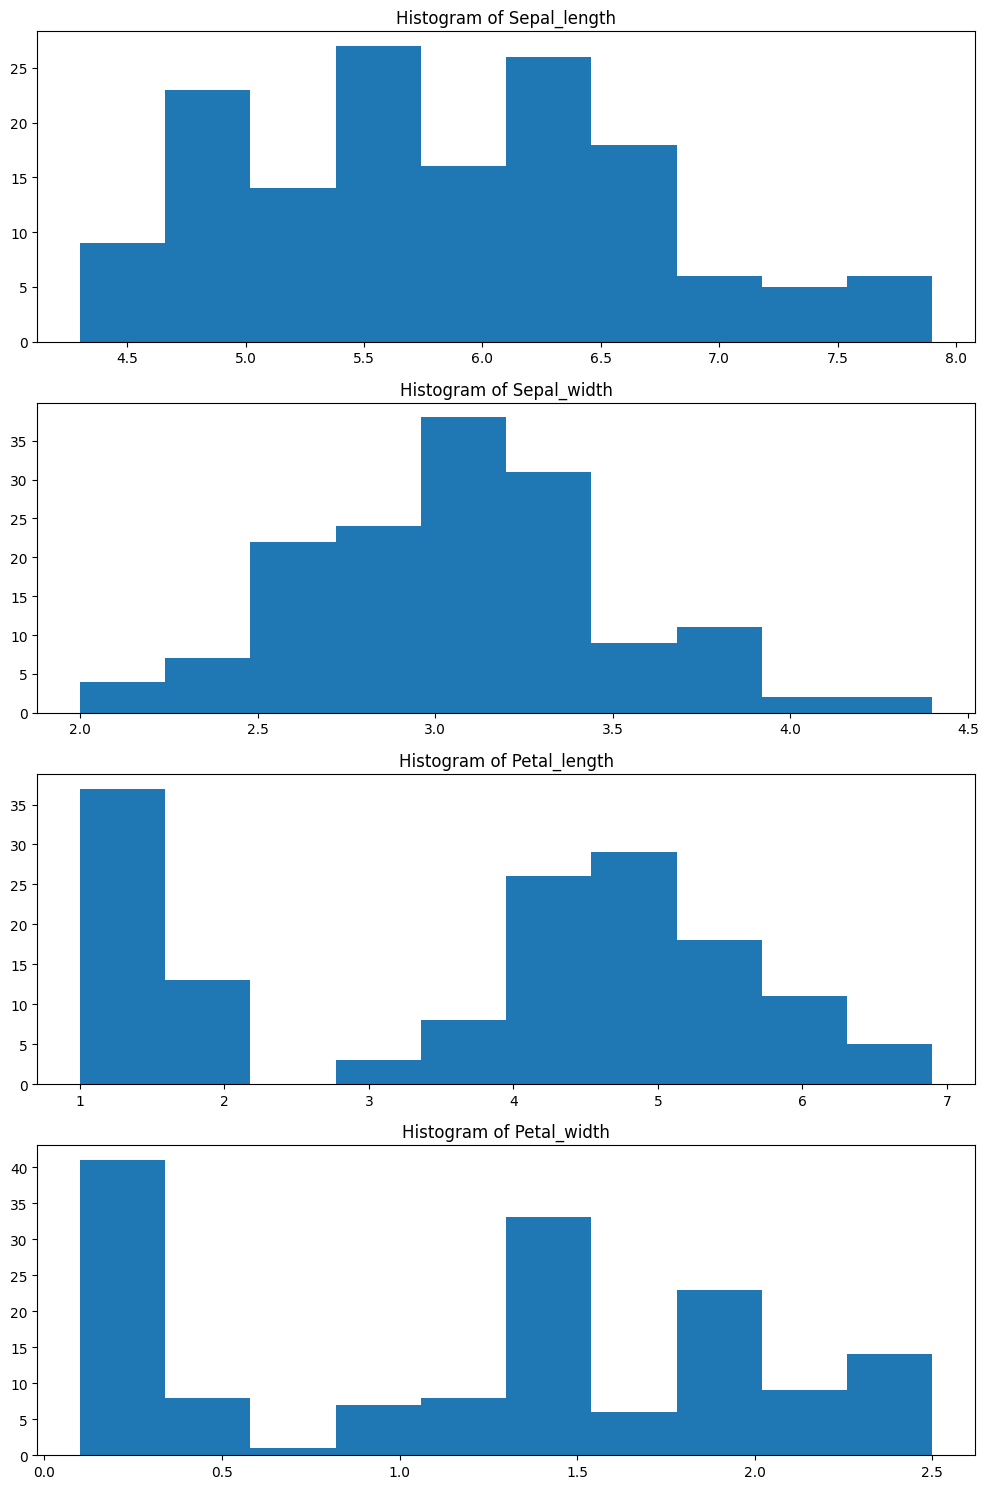

In [10]:

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))

ax[0].hist(df['sepal_length'])
ax[0].set_title('Histogram of Sepal_length')

ax[1].hist(df['sepal_width'])
ax[1].set_title('Histogram of Sepal_width')

ax[2].hist(df['petal_length'])
ax[2].set_title('Histogram of Petal_length')

ax[3].hist(df['petal_width'])
ax[3].set_title('Histogram of Petal_width')

plt.tight_layout()
plt.show()


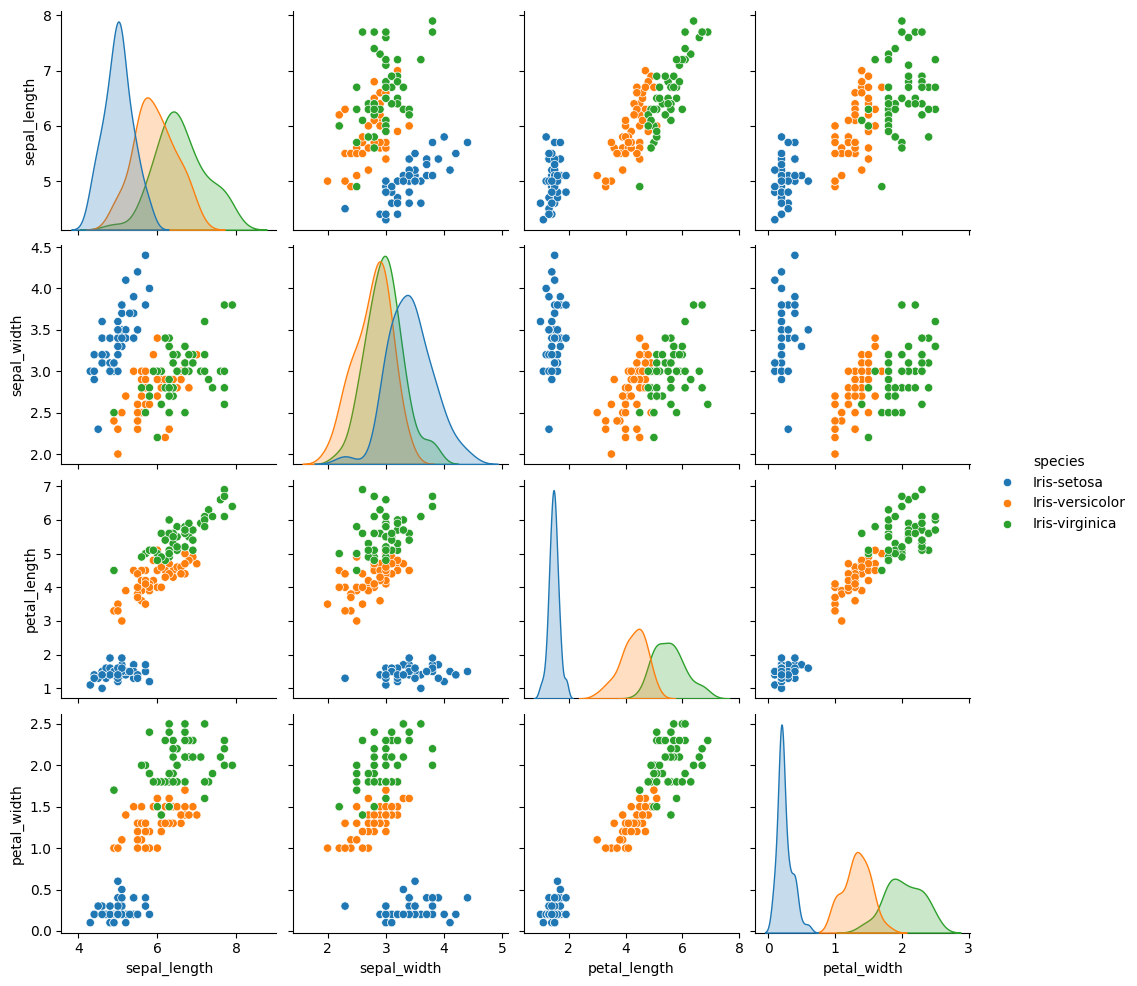

In [11]:
#relationships between different pairs of features
sns.pairplot(df, hue='species')
plt.show()


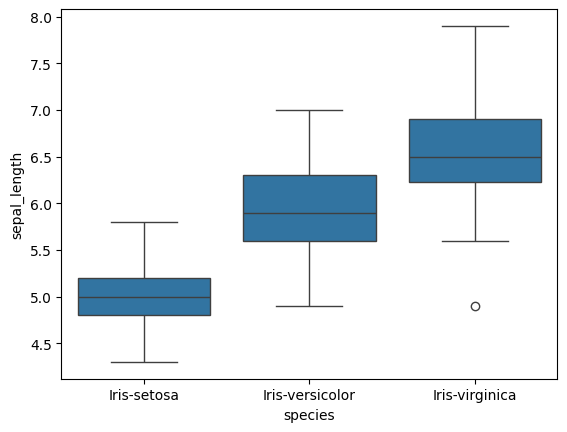

In [12]:

sns.boxplot(x='species', y='sepal_length', data=df)
plt.show()


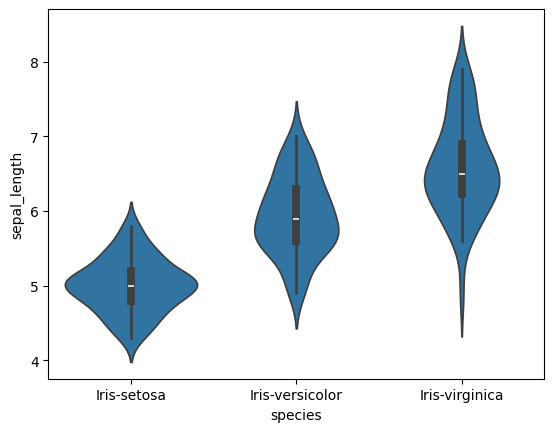

In [13]:
sns.violinplot(x='species', y='sepal_length', data=df)
plt.show()

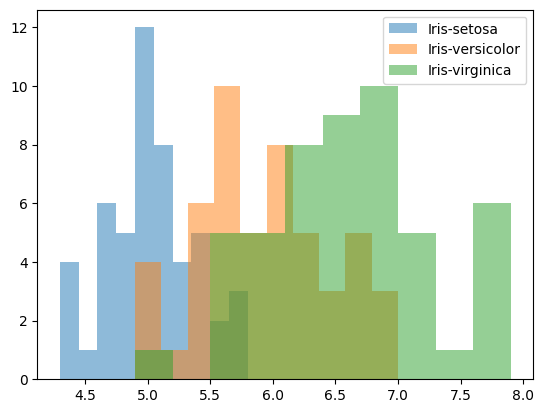

In [14]:
import matplotlib.pyplot as plt
plt.hist(df['sepal_length'][df['species'] == 'Iris-setosa'], alpha=0.5, label='Iris-setosa')
plt.hist(df['sepal_length'][df['species'] == 'Iris-versicolor'], alpha=0.5, label='Iris-versicolor')
plt.hist(df['sepal_length'][df['species'] == 'Iris-virginica'], alpha=0.5, label='Iris-virginica')
plt.legend()
plt.show()


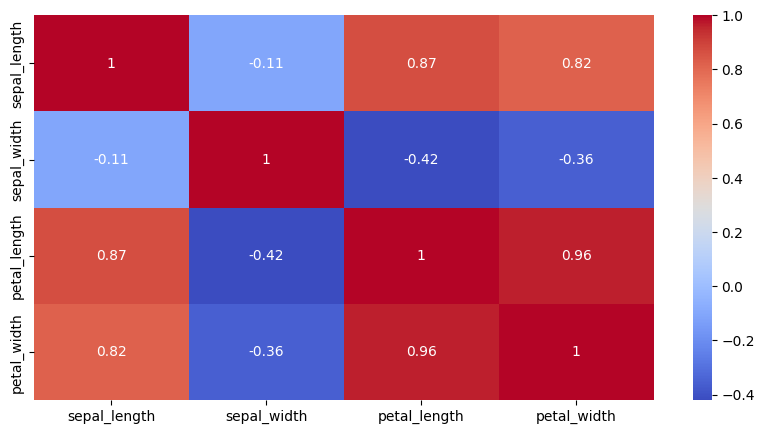

In [15]:
plt.figure(figsize=(10,5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


# Splitting Data in training and test data

In [16]:
X=df.drop('species',axis=1)
y=df['species']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=69)

# **Data Scaling**

In [17]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [18]:
X_train_scaled

array([[-1.45994639,  0.38089498, -1.34024236, -1.33426404],
       [-1.69830498,  0.38089498, -1.39780466, -1.33426404],
       [-0.8640499 ,  1.78727642, -1.28268005, -1.19914869],
       [ 0.32774307, -0.08789884,  0.67443835,  0.82758149],
       [ 2.23461182, -1.02548647,  1.82568447,  1.50315822],
       [ 1.28117744,  0.38089498,  1.1349368 ,  1.50315822],
       [-1.81748428, -0.08789884, -1.51292928, -1.46937939],
       [-0.26815342, -0.08789884,  0.44418913,  0.42223546],
       [ 1.40035674,  0.38089498,  0.55931374,  0.28712011],
       [ 0.08938447, -0.08789884,  0.78956296,  0.82758149],
       [-0.14897412,  3.19365787, -1.28268005, -1.06403335],
       [ 0.68528096,  0.38089498,  0.90468758,  1.50315822],
       [-0.50651201, -0.08789884,  0.44418913,  0.42223546],
       [-1.22158779,  0.14649807, -1.22511775, -1.33426404],
       [ 1.28117744,  0.14649807,  0.67443835,  0.42223546],
       [-1.1024085 , -1.49428029, -0.24655854, -0.25334127],
       [-0.02979482, -0.

# **MODEL**

In [19]:
models={
  'Logistic_Regression':LogisticRegression(random_state=69),
  'DecisionTreeClassifier':DecisionTreeClassifier(random_state=69),
  'RandomForestClassifier':RandomForestClassifier(random_state=69),
  'AdaboostClassifier':AdaBoostClassifier(random_state=69),
  'GradientBoostingClassifier':GradientBoostingClassifier(random_state=69),
'KneighborsClassifier':KNeighborsClassifier()

}

In [20]:
def evaluate_model(X_train,X_test,y_train,y_test,models):
  score={}
  for i in range(len(models)):
    clf=list(models.values())[i]
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(list(models.keys())[i])
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    score[list(models.keys())[i]]=accuracy_score(y_test,y_pred)

  return score

In [21]:
evaluate_model(X_train_scaled,X_test_scaled,y_train,y_test,models)

Logistic_Regression
[[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

0.9666666666666667
DecisionTreeClassifier
[[10  0  0]
 [ 0  8  0]
 [ 0  2 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.80      1.00      0.89         8
 Iris-virginica       1.00      0.83      0.91        12

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30

0.9333333333333333
RandomForestClassifier
[[10  0  0]
 [ 0  

{'Logistic_Regression': 0.9666666666666667,
 'DecisionTreeClassifier': 0.9333333333333333,
 'RandomForestClassifier': 0.9666666666666667,
 'AdaboostClassifier': 0.9333333333333333,
 'GradientBoostingClassifier': 0.9333333333333333,
 'KneighborsClassifier': 0.9666666666666667}

So i am getting highest accuracy of 96.6 % from


*   LogisticRegression
*   RandomForestClassifier

*   KneighbhorsClassifier



